In [1]:
from dataclasses import asdict
import subprocess
import pandas as pd
import seaborn as sns

from logfile_reader import (
    read_pages,
    save_pages_accs,
    read_optimal_results,
    Page
)

In [2]:
BUFFER_SIZE = 128
TRAIN_PART = 0.7
DATASET = "train_data/tpcc_logfile"

TRAIN_PAGES_FILE = DATASET + "_train"
TEST_PAGES_FILE = DATASET + "_test"

TRAIN_VICTIMS = TRAIN_PAGES_FILE + "_victims"
TEST_VICTIMS = TEST_PAGES_FILE + "_victims"

OPTIMAL_VICTIMS_GEN_EXE = "./train_data/get_optimal_victims.out"

In [3]:
pages = read_pages(DATASET)
train_size = int(len(pages) * TRAIN_PART)
test_size = len(pages) - train_size
train_pages = pages[:train_size]
test_pages = pages[train_size:]

In [4]:
print(len(pages))

2211375


In [5]:
data = pd.Series([page.get_page_id() for page in pages])
value_counts = data.value_counts()
print(len(value_counts))
# sns.barplot(x=value_counts.index, y=value_counts.values)

72250


In [63]:
save_pages_accs(TRAIN_PAGES_FILE, train_pages)
save_pages_accs(TEST_PAGES_FILE, test_pages)

In [17]:
res = subprocess.run([OPTIMAL_VICTIMS_GEN_EXE, str(BUFFER_SIZE), TRAIN_PAGES_FILE, TRAIN_VICTIMS], 
                        capture_output=True, text=True)
print(res)
res = subprocess.run([OPTIMAL_VICTIMS_GEN_EXE, str(BUFFER_SIZE), TEST_PAGES_FILE, TEST_VICTIMS], 
                        capture_output=True, text=True)
print(res)

CompletedProcess(args=['./train_data/get_optimal_victims.out', '128', 'train_data/tpcc_small_logfile_train', 'train_data/tpcc_small_logfile_train_victims'], returncode=0, stdout='128\n0\n10000\n20000\n30000\n40000\n50000\n60000\n70000\n80000\n90000\n100000\n110000\n120000\n130000\n140000\n150000\n160000\n170000\n180000\n190000\n200000\n210000\n220000\n230000\n240000\n250000\n260000\n270000\n280000\n290000\n300000\n310000\n320000\n330000\n340000\n350000\n360000\n370000\n380000\n390000\n400000\n410000\n420000\n430000\n440000\n450000\n460000\n470000\n480000\n490000\n500000\n510000\n520000\n530000\n540000\n550000\n560000\n570000\n580000\n590000\n600000\n610000\n620000\n630000\n640000\n650000\n660000\n670000\n680000\n690000\n697004\n', stderr='')
CompletedProcess(args=['./train_data/get_optimal_victims.out', '128', 'train_data/tpcc_small_logfile_test', 'train_data/tpcc_small_logfile_test_victims'], returncode=0, stdout='128\n0\n10000\n20000\n30000\n40000\n50000\n60000\n70000\n80000\n90000\n

In [6]:
train_optimal_results = read_optimal_results(TRAIN_VICTIMS)
test_optimal_results = read_optimal_results(TEST_VICTIMS)

In [7]:
len(train_optimal_results)

1547962

In [8]:
len(test_optimal_results)

663413

In [9]:
sum([page.hit for page in train_pages]) / len(train_pages)

0.717374845118937

In [10]:
sum([1 for x in train_optimal_results if len(x) == 0]) / len(train_optimal_results)

0.7674406736082668

128


<Axes: xlabel='None'>

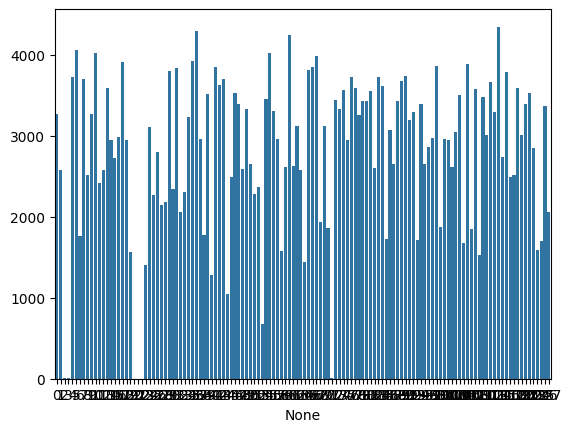

In [11]:
data = pd.Series([x[0][0] for x in train_optimal_results if len(x) != 0])
value_counts = data.value_counts()
print(len(value_counts))
sns.barplot(x=value_counts.index, y=value_counts.values)

In [12]:
sum([page.hit for page in test_pages]) / len(test_pages)

0.7075577355282456

In [13]:
sum([1 for x in test_optimal_results if len(x) == 0]) / len(test_optimal_results)

0.7600001808827985

128


<Axes: xlabel='None'>

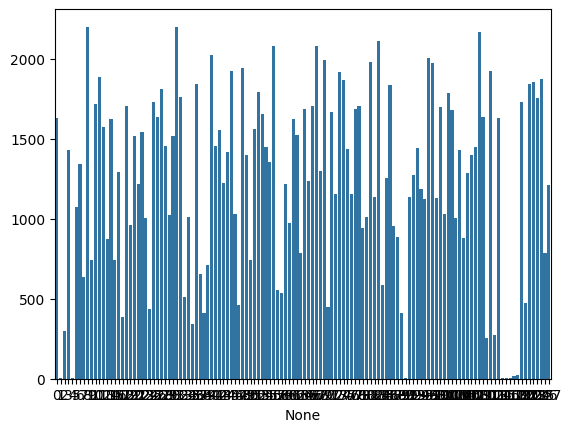

In [14]:
data = pd.Series([x[0][0] for x in test_optimal_results if len(x) != 0])
value_counts = data.value_counts()
print(len(value_counts))
sns.barplot(x=value_counts.index, y=value_counts.values)

<Axes: >

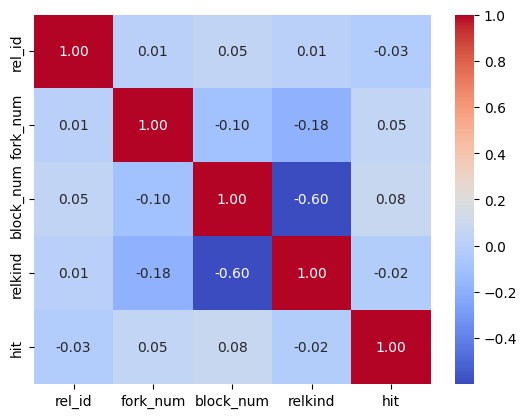

In [23]:
df = pd.DataFrame([asdict(page) for page in pages])
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [24]:
pages

[Page(rel_id=0, fork_num=0, block_num=0, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=0, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=0, relkind=1, hit=1),
 Page(rel_id=0, fork_num=0, block_num=0, relkind=1, hit=1),
 Page(rel_id=0, fork_num=0, block_num=0, relkind=1, hit=1),
 Page(rel_id=0, fork_num=0, block_num=0, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=1, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=2, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=3, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=0, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=1, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=2, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=3, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=4, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=5, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=6, relkind=1, hit=0),
 Page(rel_id=0, fork_num=0, block_num=7,